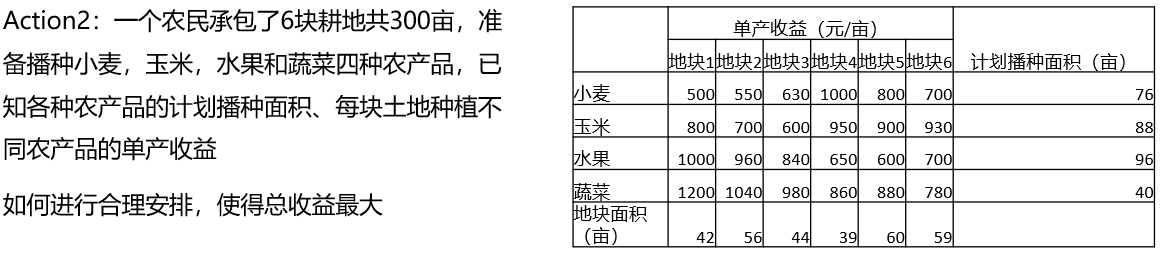

In [1]:
import pandas as pd
from pulp import * 

In [2]:
# 有四种农作物
item = ['wheat', 'corn', 'fruit', 'vegetables']

# 每种农作物在不同地块上的收益 
wheat = {'field1': 500,
        'field2': 550,
        'field3': 630,
        'field4': 1000,
        'field5': 800,
        'field6': 700}
corn = {'field1': 800,
        'field2': 700,
        'field3': 600,
        'field4': 950,
        'field5': 900,
        'field6': 930}
fruit = {'field1': 1000,
        'field2': 960,
        'field3': 840,
        'field4': 650,
        'field5': 600,
        'field6': 700}
vegetables = {'field1': 1200,
        'field2': 1040,
        'field3': 980,
        'field4': 860,
        'field5': 880,
        'field6': 780}

In [3]:
df = pd.DataFrame([wheat, corn, fruit, vegetables], index=item)
df

,field1,field2,field3,field4,field5,field6
wheat,500,550,630,1000,800,700
corn,800,700,600,950,900,930
fruit,1000,960,840,650,600,700
vegetables,1200,1040,980,860,880,780


In [4]:
# 都有哪些农作物
field = df.keys().values

In [5]:
# 创建问题实例
prob = LpProblem('Seed', LpMaximize)

In [6]:
# 变量
item_field_vars = [[LpVariable(f'{j}_{i}', lowBound=0) for i in field] for j in item] 
print(item_field_vars)

[[wheat_field1, wheat_field2, wheat_field3, wheat_field4, wheat_field5, wheat_field6], [corn_field1, corn_field2, corn_field3, corn_field4, corn_field5, corn_field6], [fruit_field1, fruit_field2, fruit_field3, fruit_field4, fruit_field5, fruit_field6], [vegetables_field1, vegetables_field2, vegetables_field3, vegetables_field4, vegetables_field5, vegetables_field6]]


In [7]:
# 目标方程
prob += lpSum([[item_field_vars[i][j]*df.iloc[i][j] for i in range(len(item_field_vars))] for j in range(len(item_field_vars[0]))])

In [8]:
# 对于各个item的计划播种面积
prob += lpSum([item_field_vars[0][i] for i in range(len(item_field_vars[0]))]) <= 76
prob += lpSum([item_field_vars[1][i] for i in range(len(item_field_vars[1]))]) <= 88
prob += lpSum([item_field_vars[2][i] for i in range(len(item_field_vars[2]))]) <= 96
prob += lpSum([item_field_vars[3][i] for i in range(len(item_field_vars[3]))]) <= 40

In [9]:
# 对于各个field的计划播种面积, 4种植物的总和
prob += lpSum([item_field_vars[i][0] for i in range(len(item_field_vars))]) <= 42
prob += lpSum([item_field_vars[i][1] for i in range(len(item_field_vars))]) <= 56
prob += lpSum([item_field_vars[i][2] for i in range(len(item_field_vars))]) <= 44
prob += lpSum([item_field_vars[i][3] for i in range(len(item_field_vars))]) <= 39
prob += lpSum([item_field_vars[i][4] for i in range(len(item_field_vars))]) <= 60
prob += lpSum([item_field_vars[i][5] for i in range(len(item_field_vars))]) <= 59

In [10]:
# 求解
prob.solve()

1

In [11]:
# 求解状态
print("Status:", LpStatus[prob.status])

Status: Optimal


In [12]:
result = 0
for i in range(len(item_field_vars)):
    for j in range(len(item_field_vars[0])):
      # 每一个变量的取值
      print('{} = {}'.format(item_field_vars[i][j],item_field_vars[i][j].value()))
      # 计算结果
      result += item_field_vars[i][j].value()*df.iloc[i][j] 
print('\n最优解：', result)

wheat_field1 = 0.0
wheat_field2 = 0.0
wheat_field3 = 6.0
wheat_field4 = 39.0
wheat_field5 = 31.0
wheat_field6 = 0.0
corn_field1 = 0.0
corn_field2 = 0.0
corn_field3 = 0.0
corn_field4 = 0.0
corn_field5 = 29.0
corn_field6 = 59.0
fruit_field1 = 2.0
fruit_field2 = 56.0
fruit_field3 = 38.0
fruit_field4 = 0.0
fruit_field5 = 0.0
fruit_field6 = 0.0
vegetables_field1 = 40.0
vegetables_field2 = 0.0
vegetables_field3 = 0.0
vegetables_field4 = 0.0
vegetables_field5 = 0.0
vegetables_field6 = 0.0

最优解： 284230.0
